# **Deep Learning Project: Street View Housing Number Digit Recognition**

# **Marks: 60**

--------------
## **Context**
--------------

One of the most interesting tasks in deep learning is to recognize objects in natural scenes. The ability to process visual information using machine learning algorithms can be very useful as demonstrated in various applications.

The SVHN dataset contains over 600,000 labeled digits cropped from street-level photos. It is one of the most popular image recognition datasets. It has been used in neural networks created by Google to improve the map quality by automatically transcribing the address numbers from a patch of pixels. The transcribed number with a known street address helps pinpoint the location of the building it represents.

----------------
## **Objective**
----------------

Our objective is to predict the number depicted inside the image by using Artificial or Fully Connected Feed Forward Neural Networks and Convolutional Neural Networks. We will go through various models of each and finally select the one that is giving us the best performance.

-------------
## **Dataset**
-------------
Here, we will use a subset of the original data to save some computation time. The dataset is provided as a .h5 file. The basic preprocessing steps have been applied on the dataset.

## **Mount the drive**

Let us start by mounting the Google drive. You can run the below cell to mount the Google drive.

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## **Importing the necessary libraries**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math

import tensorflow as tf

# Keras Sequential Model
from tensorflow.keras.models import Sequential
from sklearn.model_selection import train_test_split

# Importing all the different layers and optimizers. Getting a few extra libraries that may or may not be needed.
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, Activation

# Optimizers
from tensorflow.keras.optimizers import Adam,SGD

# For Categorical variables
from tensorflow.keras.utils import to_categorical

# The below code can be used to ignore the warnings that may occur due to deprecations
import warnings
warnings.filterwarnings("ignore")

**Let us check the version of tensorflow.**

In [ ]:
print(tf.__version__)

2.13.0


## **Load the dataset**

- Let us now load the dataset that is available as a .h5 file.
- Split the data into the train and the test dataset.

In [ ]:
#Loading the Dataset
import h5py as h5fy
h5f=h5fy.File('/content/drive/My Drive/MIT_IDSS/Elective project/SVHN_single_grey1.h5','r')

In [ ]:
#Split the Dataset into test and train
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]
h5f.close()

Check the number of images in the training and the testing dataset.

In [ ]:
len(X_train), len(X_test)

(42000, 18000)

In [ ]:
print('X_train' ,X_train.shape)
print('y_train' ,y_train.shape)
print('X_test' ,X_test.shape)
print('y_test' ,y_test.shape)

X_train (42000, 32, 32)
y_train (42000,)
X_test (18000, 32, 32)
y_test (18000,)


**Observation: The test set has 42000 images. Each is 32x32. The training set has 18000 images of teh same size.**

## **Visualizing images**

- Use X_train to visualize the first 10 images.
- Use Y_train to print the first 10 labels.

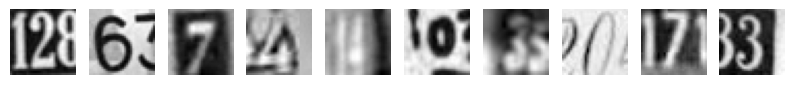

label for each of the above image: [2 6 7 4 4 0 3 0 7 3]


In [ ]:
#Visualizing first 10 images and printing their labels.
plt.figure(figsize = (10, 1))

for i in range(10):

    plt.subplot(1, 10, i+1)

    plt.imshow(X_train[i], cmap = "gray")

    plt.axis('off')

plt.show()

print('label for each of the above image: %s' % (y_train[0:10]))

## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [ ]:
#Shape and array of first image in training dataset.
print("Shape:", X_train[0].shape)

print("First image:\n", X_train[0])

Shape: (32, 32)
First image:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


In [ ]:
# Reshaping the dataset, flattening and converting 3D to 2D
X_train = X_train.reshape(X_train.shape[0], 1024)

X_test = X_test.reshape(X_test.shape[0], 1024)

### **Normalize the train and the test data**

In [ ]:
# Normalizing the image data for test and train sets
X_train_normalized = X_train.astype('float32')/255.0
X_test_normalized = X_test.astype('float32')/255.0

Print the shapes of Training and Test data

In [ ]:
#Shape and array of first image in training dataset.
print("Training Shape:", X_train_normalized.shape, y_train.shape)
print("Test Shape:",X_test_normalized.shape, y_test.shape)

Training Shape: (42000, 1024) (42000,)
Test Shape: (18000, 1024) (18000,)


### **One-hot encode output**

In [ ]:
# Creating one-hot encoded representation of target labels

y_train = to_categorical(y_train)

y_test= to_categorical(y_test)

#Labels..
y_test


array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

**Observation: Eache category is now one-hot encoded vector, meaning there is a 1 in one particular location and 0 everywhere else in that row or column.**


## **Model Building**

Now that we have done the data preprocessing, let's build an ANN model.

### Fix the seed for random number generators

In [ ]:
# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

### **Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **64 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **32 nodes and the relu activation**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_1 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train an ANN model as per the above mentioned architecture.**

In [ ]:
#First hidden layer with 64 nodes and the relu activation and the input shape = (1024, )
#Second hidden layer with 32 nodes and the relu activation
#Output layer with activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10

def nn_model_1():
  model=Sequential()

  # Adding a sequential layer with 64 neurons and Relu activation.
  model.add(Dense(64,input_shape = (1024, ), activation='relu'))

  # Adding a second layer with 32 nodes and relu activation
  model.add(Dense(32, activation='relu'))

  #Output layer with 10 nodes because there are ten classes and softmax activation because it is a classification problem.
  model.add(Dense(10, activation='softmax'))

  #Definining Optimizer
  opt = Adam(learning_rate=0.001)

  #Compile the model
  model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

  return(model)


In [ ]:
#Building the model
model_1=nn_model_1()

In [ ]:
#Summary of the model
model_1.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 64)                65600     
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 68010 (265.66 KB)
Trainable params: 68010 (265.66 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
history_model_1 = model_1.fit(X_train_normalized,
                            y_train,
                            validation_split=0.2,
                            batch_size=128,
                            epochs = 20,
                            verbose = 1)

Epoch 1/20
263/263 [==============================] - 3s 9ms/step - loss: 2.2934 - accuracy: 0.1233 - val_loss: 2.2324 - val_accuracy: 0.1744
Epoch 2/20
263/263 [==============================] - 2s 7ms/step - loss: 2.0774 - accuracy: 0.2509 - val_loss: 1.9318 - val_accuracy: 0.3089
Epoch 3/20
263/263 [==============================] - 1s 5ms/step - loss: 1.8679 - accuracy: 0.3405 - val_loss: 1.7779 - val_accuracy: 0.3869
Epoch 4/20
263/263 [==============================] - 1s 4ms/step - loss: 1.6573 - accuracy: 0.4391 - val_loss: 1.5288 - val_accuracy: 0.4907
Epoch 5/20
263/263 [==============================] - 1s 4ms/step - loss: 1.4635 - accuracy: 0.5180 - val_loss: 1.4202 - val_accuracy: 0.5255
Epoch 6/20
263/263 [==============================] - 1s 4ms/step - loss: 1.3588 - accuracy: 0.5568 - val_loss: 1.3240 - val_accuracy: 0.5768
Epoch 7/20
263/263 [==============================] - 1s 5ms/step - loss: 1.2895 - accuracy: 0.5839 - val_loss: 1.2558 - val_accuracy: 0.6013
Epoch 

### **Plot the Training and Validation Accuracies and write down your Observations.**

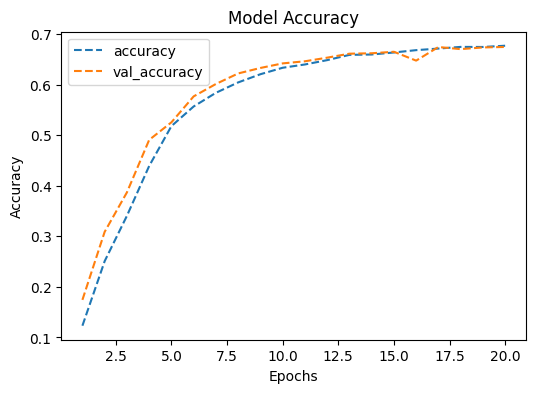

In [ ]:
# Plotting the accuracies

dict_hist = history_model_1.history

list_ep = [i for i in range(1, 21)]

plt.figure(figsize = (6, 4))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.title('Model Accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

**Observations:**

**This is pretty poor performance with test accuracy of around 67% and validadtion accuracy of 67%. While the accuracy is low, the performance has the same behavior for both training and validation. This model needs to be improved by batch normalization, dropout or increasing the number of neurons and/or layers.**

Let's build one more model with higher complexity and see if we can improve the performance of the model.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [ ]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [ ]:
# Fixing the seed for random number generators
import random
np.random.seed(42)
random.seed(42)
tf.random.set_seed(42)

### **Second Model Architecture**
- Write a function that returns a sequential model with the following architecture:
 - First hidden layer with **256 nodes and the relu activation** and the **input shape = (1024, )**
 - Second hidden layer with **128 nodes and the relu activation**
 - Add the **Dropout layer with the rate equal to 0.2**
 - Third hidden layer with **64 nodes and the relu activation**
 - Fourth hidden layer with **64 nodes and the relu activation**
 - Fifth hidden layer with **32 nodes and the relu activation**
 - Add the **BatchNormalization layer**
 - Output layer with **activation as 'softmax' and number of nodes equal to the number of classes, i.e., 10**
 -Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.0005), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the nn_model_2 function and store the model in a new variable.
- Print the summary of the model.
- Fit on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the new ANN model as per the above mentioned architecture**

In [ ]:
#Second Model architeture
def nn_model_2():
  model=Sequential()

  # Adding a sequential layer with 256 neurons and Relu activation.
  model.add(Dense(256,input_shape = (1024, ), activation='relu'))
  #model.add(BatchNormalization())
  # Adding a second layer with 128 nodes and relu activation
  model.add(Dense(128, activation='relu'))
  #model.add(BatchNormalization())
  # Add a dropout layer
  model.add(Dropout(0.2))
  # Adding a second layer with 64 nodes and relu activation
  model.add(Dense(64, activation='relu'))
  model.add(Dense(64, activation='relu'))
  model.add(Dense(32, activation='relu'))

  #Adding Batch Normalization
  model.add(BatchNormalization())

  #Output layer with 10 nodes because there are ten classes and softmax activation because it is a classification problem.
  model.add(Dense(10, activation='softmax'))

  #Definining Optimizer
  opt = Adam(learning_rate=0.0005)

  #Compile the model
  model.compile(optimizer = opt, loss = 'categorical_crossentropy', metrics = ['accuracy'])

  return(model)


In [ ]:
#Building the model
model_2=nn_model_2()

In [ ]:
#Summary of the model
model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               262400    
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 64)                4160      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 batch_normalization (Batch  (None, 32)                1

In [ ]:
history_model_2 = model_2.fit(X_train_normalized,
                            y_train,
                            validation_split=0.2,
                            batch_size=128,
                            epochs = 30,
                            verbose = 1)

Epoch 1/30
263/263 [==============================] - 8s 22ms/step - loss: 2.3300 - accuracy: 0.1007 - val_loss: 2.3138 - val_accuracy: 0.0967
Epoch 2/30
263/263 [==============================] - 4s 16ms/step - loss: 2.3042 - accuracy: 0.1028 - val_loss: 2.3015 - val_accuracy: 0.1100
Epoch 3/30
263/263 [==============================] - 3s 11ms/step - loss: 2.1699 - accuracy: 0.1746 - val_loss: 2.0564 - val_accuracy: 0.2769
Epoch 4/30
263/263 [==============================] - 3s 11ms/step - loss: 1.6402 - accuracy: 0.4238 - val_loss: 1.4454 - val_accuracy: 0.5273
Epoch 5/30
263/263 [==============================] - 3s 11ms/step - loss: 1.3608 - accuracy: 0.5385 - val_loss: 1.3064 - val_accuracy: 0.5701
Epoch 6/30
263/263 [==============================] - 4s 16ms/step - loss: 1.2484 - accuracy: 0.5870 - val_loss: 1.1214 - val_accuracy: 0.6388
Epoch 7/30
263/263 [==============================] - 3s 12ms/step - loss: 1.1568 - accuracy: 0.6251 - val_loss: 1.1023 - val_accuracy: 0.6400

### **Plot the Training and Validation Accuracies and write down your Observations.**

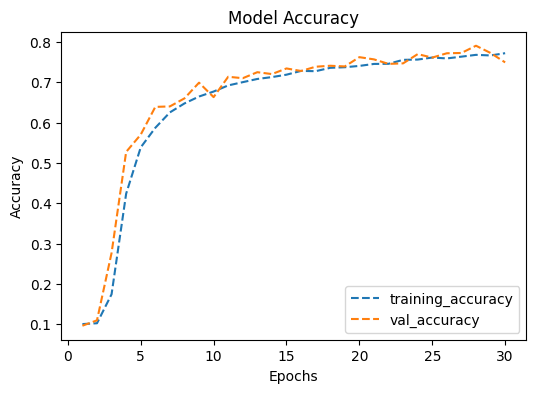

In [ ]:
# Plotting the accuracies

dict_hist = history_model_2.history

list_ep = [i for i in range(1, 31)]

plt.figure(figsize = (6, 4))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'training_accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.title('Model Accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

**Observations: The performance improved to an accuracy of 77% in training and 75% in validation. In various experiemnets commented out in the code above, I could take the accuracy close to 80% by introducing BatchNormalization and Dropout after every Dense layer**

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

In [ ]:
test_pred = model_2.predict(X_test_normalized)

test_pred = np.argmax(test_pred, axis = -1)

563/563 [==============================] - 2s 2ms/step


**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [ ]:
# Converting each entry to single label from one-hot encoded vector

y_test= np.argmax(y_test, axis = -1)

### **Print the classification report and the confusion matrix for the test predictions. Write your observations on the final results.**

              precision    recall  f1-score   support

           0       0.86      0.70      0.77      1814
           1       0.59      0.89      0.71      1828
           2       0.76      0.77      0.76      1803
           3       0.78      0.67      0.72      1719
           4       0.73      0.85      0.79      1812
           5       0.82      0.67      0.73      1768
           6       0.76      0.72      0.74      1832
           7       0.75      0.82      0.78      1808
           8       0.71      0.71      0.71      1812
           9       0.83      0.65      0.73      1804

    accuracy                           0.74     18000
   macro avg       0.76      0.74      0.74     18000
weighted avg       0.76      0.74      0.74     18000



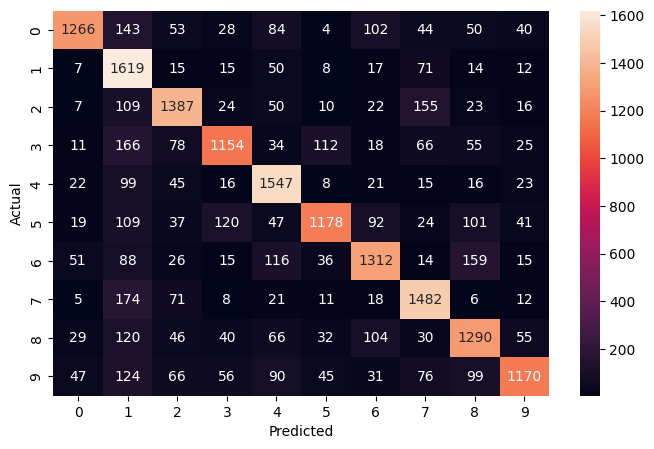

In [ ]:
# Importing required functions for classificaation report and confusion matrix

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

# Printing the classification report
print(classification_report(y_test, test_pred))

# Creating and Printing Confusion Matrix
cm = confusion_matrix(y_test, test_pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f')

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()


**Final Observations:__________**

- Digits 3, 5, 9 have Recall rate of below 0.70, hence these were classified incorrectly the most. Overall, the recall rates are poor.

- F1 score is also early to mid 0.70's for all.

- In general, while the validation follows the training closely, the accuracy is not good.

## **Using Convolutional Neural Networks**

### **Load the dataset again and split the data into the train and the test dataset.**

In [ ]:
import h5py as h5fy
h5f=h5fy.File('/content/drive/My Drive/MIT_IDSS/Elective project/SVHN_single_grey1.h5','r')

In [ ]:
X_train = h5f['X_train'][:]
y_train = h5f['y_train'][:]
X_test = h5f['X_test'][:]
y_test = h5f['y_test'][:]
h5f.close()

Check the number of images in the training and the testing dataset.

In [ ]:
len(X_train), len(X_test)

(42000, 18000)

**Observation:** There are 42,000 training images and 18,000 test images.


## **Data preparation**

- Print the shape and the array of pixels for the first image in the training dataset.
- Reshape the train and the test dataset because we always have to give a 4D array as input to CNNs.
- Normalize the train and the test dataset by dividing by 255.
- Print the new shapes of the train and the test dataset.
- One-hot encode the target variable.

In [ ]:
# Shape and the array of pixels for the first image

print("Shape:", X_train[0].shape)

print()

print("First image:\n", X_train[0])

Shape: (32, 32)

First image:
 [[ 33.0704  30.2601  26.852  ...  71.4471  58.2204  42.9939]
 [ 25.2283  25.5533  29.9765 ... 113.0209 103.3639  84.2949]
 [ 26.2775  22.6137  40.4763 ... 113.3028 121.775  115.4228]
 ...
 [ 28.5502  36.212   45.0801 ...  24.1359  25.0927  26.0603]
 [ 38.4352  26.4733  23.2717 ...  28.1094  29.4683  30.0661]
 [ 50.2984  26.0773  24.0389 ...  49.6682  50.853   53.0377]]


Reshape the dataset to be able to pass them to CNNs. Remember that we always have to give a 4D array as input to CNNs

In [ ]:
# Reshaping the dataset to be able to pass them to CNNs. Give a 4D array as input to CNNs

X_train = X_train.reshape(X_train.shape[0], 32, 32, 1)

X_test = X_test.reshape(X_test.shape[0], 32, 32, 1)

Normalize inputs from 0-255 to 0-1

In [ ]:
# Normalizing inputs from 0-255 to 0-1

X_train = X_train / 255.0

X_test = X_test / 255.0

Print New shape of Training and Test

In [ ]:
# Printing new shape of training and test data
print('Training set:', X_train.shape, y_train.shape)

print('Test set:', X_test.shape, y_test.shape)

Training set: (42000, 32, 32, 1) (42000,)
Test set: (18000, 32, 32, 1) (18000,)


### **One-hot encode the labels in the target variable y_train and y_test.**

In [ ]:
# One-hot encoding of target variables
y_train = to_categorical(y_train)

y_test= to_categorical(y_test)

#Labels..
y_test

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 1.],
       [0., 0., 1., ..., 0., 0., 0.]], dtype=float32)

**Observation:**
-
Each entry of the target variable is a one-hot encoded vector instead of a single label.


## **Model Building**

Now that we have done data preprocessing, let's build a CNN model.
Fix the seed for random number generators

In [ ]:
# The seed for random number generators

np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

### **Model Architecture**
- **Write a function** that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Another **LeakyRelu** with the **slope equal to 0.1**
 - A **max-pooling layer** with a **pool size of 2x2**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **loss equal to categorical_crossentropy, optimizer equal to Adam(learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_1 and store the output in a new variable.
- Print the summary of the model.
- Fit the model on the training data with a **validation split of 0.2, batch size = 32, verbose = 1, and epochs = 20**. Store the model building history to use later for visualization.

### **Build and train a CNN model as per the above mentioned architecture.**

1. Building the Model

In [ ]:
from keras.layers import Dense, LeakyReLU

In [ ]:
# Intializing a sequential model
def cnn_model_1():
  model = Sequential()

# Adding first conv layer with 16 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of the data
  model.add(Conv2D(16, (3, 3), padding="same", input_shape=(32, 32, 1)))

# Adding a Leaky Relu layer with slope = 0.1
  model.add(LeakyReLU(alpha=0.1))

# Adding second conv layer with 32 filters and kernel size 3x3
  model.add(Conv2D(32, (3, 3), padding="same", input_shape=(32, 32, 1)))

# Adding a Leaky Relu layer with slope = 0.1
  model.add(LeakyReLU(alpha=0.1))

# Adding max pooling to reduce the size of output of first conv layer
  model.add(MaxPooling2D((2, 2), padding = 'same'))

# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
  model.add(Flatten())

# Adding a fully connected dense layer with 32 neurons
  model.add(Dense(32))

# Adding a Leaky Relu layer with slope = 0.1
  model.add(LeakyReLU(alpha=0.1))

# Adding the output layer with 10 neurons and activation functions as softmax since this is a multi-class classification problem
  model.add(Dense(10, activation='softmax'))

# Using SGD Optimizer
  opt = Adam(learning_rate=0.001)

# Compile model
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

  return(model)

In [ ]:
# Building the model
cnn_model_1= cnn_model_1()

In [ ]:
# Summary of the Model
cnn_model_1.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu_3 (LeakyReLU)   (None, 32, 32, 16)        0         
                                                                 
 conv2d_6 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_4 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 16, 16, 32)        0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 8192)              0         
                                                      

In [ ]:
# Fit the Model and save it as history

history_cnn_model_1 = cnn_model_1.fit(X_train,
                            y_train,
                            validation_split=0.2,
                            batch_size=32,
                            epochs = 20,
                            verbose = 1)

Epoch 1/20
1050/1050 [==============================] - 70s 66ms/step - loss: 1.1751 - accuracy: 0.6097 - val_loss: 0.6261 - val_accuracy: 0.8239
Epoch 2/20
1050/1050 [==============================] - 71s 68ms/step - loss: 0.5385 - accuracy: 0.8467 - val_loss: 0.4990 - val_accuracy: 0.8581
Epoch 3/20
1050/1050 [==============================] - 76s 72ms/step - loss: 0.4438 - accuracy: 0.8701 - val_loss: 0.4959 - val_accuracy: 0.8604
Epoch 4/20
1050/1050 [==============================] - 76s 72ms/step - loss: 0.3857 - accuracy: 0.8854 - val_loss: 0.4453 - val_accuracy: 0.8746
Epoch 5/20
1050/1050 [==============================] - 76s 72ms/step - loss: 0.3397 - accuracy: 0.8982 - val_loss: 0.4646 - val_accuracy: 0.8707
Epoch 6/20
1050/1050 [==============================] - 71s 68ms/step - loss: 0.2998 - accuracy: 0.9099 - val_loss: 0.4608 - val_accuracy: 0.8733
Epoch 7/20
1050/1050 [==============================] - 69s 66ms/step - loss: 0.2687 - accuracy: 0.9178 - val_loss: 0.4395 -

### **Plot the Training and Validation Accuracies and Write your observations.**

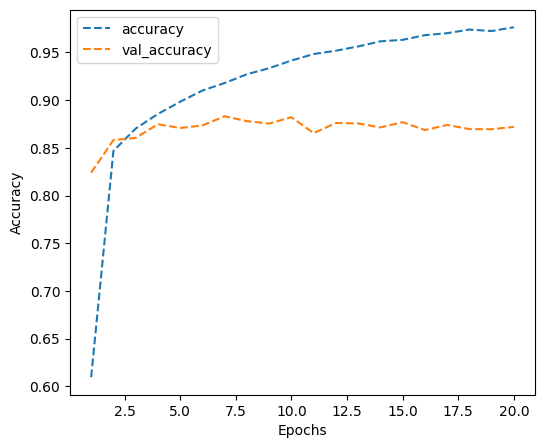

In [ ]:
# Plotting the accuracies

dict_hist = history_cnn_model_1.history

list_ep = [i for i in range(1, 21)]

plt.figure(figsize = (6, 5))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

**Observations:__________**
- The training accuracy is very good getting close to 95% but the validation accuracy is plateauing at 85%
- This indicates that the model is not generalizing as well after the training.
- Overall this model is still much better than both ANNs.

Let's build another model and see if we can get a better model with generalized performance.

First, we need to clear the previous model's history from the Keras backend. Also, let's fix the seed again after clearing the backend.

In [ ]:
# Clearing backend
from tensorflow.keras import backend
backend.clear_session()

In [ ]:
# Fixing the seed for random number generators

np.random.seed(42)

import random

random.seed(42)

tf.random.set_seed(42)

### **Second Model Architecture**

- Write a function that returns a sequential model with the following architecture:
 - First Convolutional layer with **16 filters and the kernel size of 3x3**. Use the **'same' padding** and provide the **input shape = (32, 32, 1)**
 - Add a **LeakyRelu layer** with the **slope equal to 0.1**
 - Second Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add **LeakyRelu** with the **slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - Third Convolutional layer with **32 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Fourth Convolutional layer **64 filters and the kernel size of 3x3 with 'same' padding**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **max-pooling layer** with a **pool size of 2x2**
 - Add a **BatchNormalization layer**
 - **Flatten** the output from the previous layer
 - Add a **dense layer with 32 nodes**
 - Add a **LeakyRelu layer with the slope equal to 0.1**
 - Add a **dropout layer with the rate equal to 0.5**
 - Add the final **output layer with nodes equal to the number of classes, i.e., 10** and **'softmax' as the activation function**
 - Compile the model with the **categorical_crossentropy loss, adam optimizers (learning_rate = 0.001), and metric equal to 'accuracy'**. Do not fit the model here, just return the compiled model.
- Call the function cnn_model_2 and store the model in a new variable.
- Print the summary of the model.
- Fit the model on the train data with a **validation split of 0.2, batch size = 128, verbose = 1, and epochs = 30**. Store the model building history to use later for visualization.

### **Build and train the second CNN model as per the above mentioned architecture.**

In [ ]:
from keras.layers import Dense, LeakyReLU

In [ ]:
# Intializing a sequential model
def cnn_model_2():
  model = Sequential()

# Adding first conv layer with 16 filters and kernel size 3x3 , padding 'same' provides the output size same as the input size
# Input_shape denotes input image dimension of the data
  model.add(Conv2D(16, (3, 3), padding="same", input_shape=(32, 32, 1)))

# Adding a Leaky Relu layer with slope = 0.1
  model.add(LeakyReLU(alpha=0.1))

# Adding second conv layer with 32 filters and kernel size 3x3
  model.add(Conv2D(32, (3, 3), padding="same", input_shape=(32, 32, 1)))

# Adding a Leaky Relu layer with slope = 0.1
  model.add(LeakyReLU(alpha=0.1))

# Adding max pooling to reduce the size of output of first conv layer
  model.add(MaxPooling2D((2, 2), padding = 'same'))

# Adding Batch Normalization layer
  model.add(BatchNormalization())

# Third Convolutional Layer of 32 nodes
  model.add(Conv2D(32, (3, 3), padding="same", input_shape=(32, 32, 1)))
# Adding a Leaky Relu layer with slope = 0.1
  model.add(LeakyReLU(alpha=0.1))

# Adding fourth conv layer with 64 filters and kernel size 3x3
  model.add(Conv2D(64, (3, 3), padding="same", input_shape=(32, 32, 1)))

# Adding a Leaky Relu layer with slope = 0.1
  model.add(LeakyReLU(alpha=0.1))

# Adding max pooling to reduce the size of output of first conv layer
  model.add(MaxPooling2D((2, 2), padding = 'same'))

# Adding Batch Normalization layer
  model.add(BatchNormalization())


# flattening the output of the conv layer after max pooling to make it ready for creating dense connections
  model.add(Flatten())

# Adding a fully connected dense layer with 32 neurons
  model.add(Dense(32))

# Adding a Leaky Relu layer with slope = 0.1
  model.add(LeakyReLU(alpha=0.1))

# Adding a Dropout layer
  model.add(Dropout(0.5))

# Adding the output layer with 10 neurons and activation functions as softmax since this is a multi-class classification problem
  model.add(Dense(10, activation='softmax'))

# Using SGD Optimizer
  opt = Adam(learning_rate=0.001)

# Compile model
  model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

  return(model)

In [ ]:
# Building the model
cnn_model_2= cnn_model_2()

In [ ]:
# Summary of the Model
cnn_model_2.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        160       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 32)        4640      
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 32, 32, 32)        0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 16, 16, 32)        0         
 D)                                                              
                                                                 
 batch_normalization (Batch  (None, 16, 16, 32)        128       
 Normalization)                                         

In [ ]:
# Fit the Model and save it as history

history_cnn_model_2 = cnn_model_2.fit(X_train,
                            y_train,
                            validation_split=0.2,
                            batch_size=128,
                            epochs = 30,
                            verbose = 1)

Epoch 1/30
263/263 [==============================] - 15s 12ms/step - loss: 1.3271 - accuracy: 0.5472 - val_loss: 1.8175 - val_accuracy: 0.3939
Epoch 2/30
263/263 [==============================] - 3s 10ms/step - loss: 0.6652 - accuracy: 0.7934 - val_loss: 0.5404 - val_accuracy: 0.8494
Epoch 3/30
263/263 [==============================] - 3s 10ms/step - loss: 0.5517 - accuracy: 0.8327 - val_loss: 0.4248 - val_accuracy: 0.8800
Epoch 4/30
263/263 [==============================] - 3s 10ms/step - loss: 0.4888 - accuracy: 0.8514 - val_loss: 0.4181 - val_accuracy: 0.8823
Epoch 5/30
263/263 [==============================] - 3s 11ms/step - loss: 0.4447 - accuracy: 0.8622 - val_loss: 0.4108 - val_accuracy: 0.8817
Epoch 6/30
263/263 [==============================] - 2s 9ms/step - loss: 0.4058 - accuracy: 0.8737 - val_loss: 0.3825 - val_accuracy: 0.8865
Epoch 7/30
263/263 [==============================] - 2s 9ms/step - loss: 0.3817 - accuracy: 0.8821 - val_loss: 0.3972 - val_accuracy: 0.8920


### **Plot the Training and Validation accuracies and write your observations.**

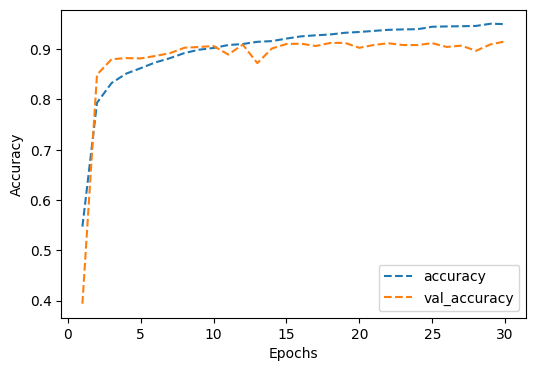

In [ ]:
# Plotting the training and validation accuracies

dict_hist = history_cnn_model_2.history

list_ep = [i for i in range(1, 31)]

plt.figure(figsize = (6, 4))

plt.plot(list_ep, dict_hist['accuracy'], ls = '--', label = 'accuracy')

plt.plot(list_ep, dict_hist['val_accuracy'], ls = '--', label = 'val_accuracy')

plt.ylabel('Accuracy')

plt.xlabel('Epochs')

plt.legend()

plt.show()

**Observations:________**

- So far this is the best model with training accuracy of 95% and validation accuracy of ~92%.
- Training and validation accuracy also follow each other closely signifying a reasonably good generalization for the model.

## **Predictions on the test data**

- Make predictions on the test set using the second model.
- Print the obtained results using the classification report and the confusion matrix.
- Final observations on the obtained results.

### **Make predictions on the test data using the second model.**

In [ ]:
# Make prediction on the test data using model_2

test_pred = cnn_model_2.predict(X_test)

test_pred = np.argmax(test_pred, axis = -1)

563/563 [==============================] - 2s 2ms/step


**Note:** Earlier, we noticed that each entry of the target variable is a one-hot encoded vector, but to print the classification report and confusion matrix, we must convert each entry of y_test to a single label.

In [ ]:
# Converting each entry to single label from one-hot encoded vector

y_test = np.argmax(y_test, axis = -1)

### **Write your final observations on the performance of the model on the test data.**

              precision    recall  f1-score   support

           0       0.92      0.94      0.93      1814
           1       0.92      0.90      0.91      1828
           2       0.93      0.92      0.93      1803
           3       0.88      0.87      0.88      1719
           4       0.94      0.91      0.92      1812
           5       0.90      0.92      0.91      1768
           6       0.91      0.89      0.90      1832
           7       0.94      0.92      0.93      1808
           8       0.89      0.91      0.90      1812
           9       0.89      0.91      0.90      1804

    accuracy                           0.91     18000
   macro avg       0.91      0.91      0.91     18000
weighted avg       0.91      0.91      0.91     18000



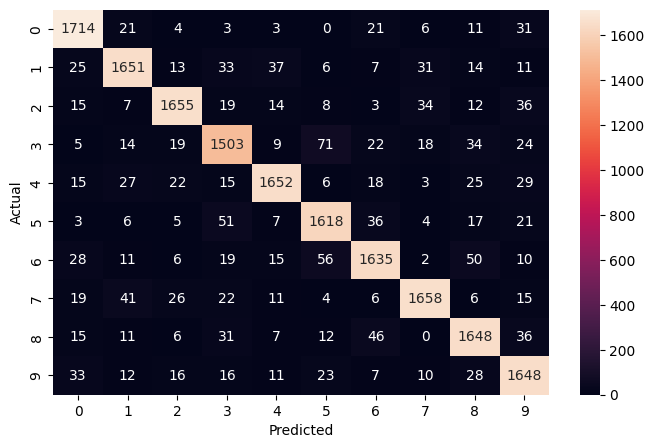

In [ ]:
# Importing required functions for performance evaluation

from sklearn.metrics import classification_report

from sklearn.metrics import confusion_matrix

# Printing the classification report

print(classification_report(y_test, test_pred))

# Plotting the heatmap using confusion matrix

cm = confusion_matrix(y_test, test_pred)

plt.figure(figsize = (8, 5))

sns.heatmap(cm, annot = True,  fmt = '.0f')

plt.ylabel('Actual')

plt.xlabel('Predicted')

plt.show()

**Final Observations:_________**

- Most digits are predicted reasonably accurately.
- Individual breakdown shows some obvious confusions:

 - 0 has the most confusion with 9 and 6
 - 1 has the most confusion with 3 and 7
 - 2 has big confusion with 7 but surprisingly with 9 as well.
 - 3 has the most confusion with 5
 - 4 is misclassified as 1 or 9 the most
 - 5 is misclassified as 3 the most
 - 6 is misclassified as 5 the most
 - 7 is misclassified as 1 overwhelmingly
 - 8 is misclassified as 6 a lot
 - 9 is misclassified as 0 or 8 the most

- In terms of Average values, all of them, Precision, recall, F1 score, are 0.91.

**Comparing the number of parameters in ANNs and CNNs**

- Both ANN models were poor in performance and evaluation. The number of parameters was around 68K for the first model with just two dense layers and ~ 310K for the second model with 5 layers. But even then the validation accuracy was not great, 67% for Model 1 and 75% for Model 2.  The models were not able to generalize the traing well.

- CNN model 1 performed better with lower number of parameters. It had two convolutional layers and one dense layer with 267K parameters. Another new feature was the Leaky ReLU activation. The validation accuracy was 87%, significantly better than ANN.

- The best model so far was CNN Model 2 with 4 Convolutional layers along with dropout and Batch Normalization. Total parameters were 164362, and it achieved a validation accuracy of 92%.

Effectively, CNNs reduced the number of parameters while increasing the accuracy.